<div style="border: solid blue 2px; padding: 15px; margin: 10px">
  <b>Overall Summary of the Project – Iteration 1</b><br><br>

  Hi Brendan, I’m <b>Victor Camargo</b> (<a href="https://hub.tripleten.com/u/e9cc9c11" target="_blank">TripleTen Hub profile</a>). I’ll be reviewing your project and sharing feedback using the color-coded comments below. Thanks for submitting your work.<br><br>

  <b>Nice work on:</b><br>
  ✔️ Performing thorough exploratory analysis and creating clear visualizations that connect with the business question.<br>
  ✔️ Dropping identifiers, applying one-hot encoding, and separating features from the target correctly.<br>
  ✔️ Training multiple models (Logistic Regression and Random Forest) and experimenting with threshold tuning, class weights, and hyperparameters.<br><br>

  A few things still need your attention before approval:<br>
  🔴 Introduce a proper three-way split (train, validation, test) and ensure the final F1 score is reported on the unseen test set.<br>
  🔴 Remove repeated preprocessing steps — prepare the data once, then focus each section on training and evaluating models.<br>
  🔴 Retrain your best model on the combined training and validation data before testing on the holdout set to finalize your results.<br><br>

  <hr>

  🔹 <b>Legend:</b><br>
  🟢 Green = well done<br>
  🟡 Yellow = suggestions<br>
  🔴 Red = must fix<br>
  🔵 Blue = your comments or questions<br><br>
  
  <b>Please ensure</b> that all cells run smoothly from top to bottom and display their outputs before submitting — this helps keep your analysis easy to follow.<br>
  <b>Kind reminder:</b> try not to move, change, or delete reviewer comments, as they are there to track progress and provide better support during your revisions.<br><br>

  <b>Feel free to reach out if you need help in Questions channel.</b><br>
</div>


We are using this data to develop a machine that as accuratley as possible will dtermine the if a customer will be leaving the bank soon. Our goal is an f1 score of at least 0.59. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np


In [3]:
#download data
data = pd.read_csv('/datasets/Churn.csv')

In [4]:
#taking at base look at data
display(data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [5]:
#diplaying data types and null values
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

In [6]:
#changing columns to lowercase for easier data manipulation and investigating null values
data.columns =  data.columns.str.lower()
display(data[data['tenure'].isnull()])

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Just wanted to take a look, but more than likely just means that the customer has just begun with the bank. This may have some weight to it when it comes to our development of the model, so we will keep this in mind. Considering the project specifies that the bank wants to know if the customer will leave 'SOON', I think the fact the some customers (through looking at this data) leave w/o even hitting a year with the bank is of significant importance.

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great job on the initial data exploration. You correctly loaded the dataset and displayed its structure. Renaming all columns to lowercase is a neat and practical step for easier manipulation. Investigating the missing `tenure` values and reasoning about their significance shows thoughtful analysis and good awareness of the business context.
</div>


Now i want to visualize some relationships between certain features and churn.

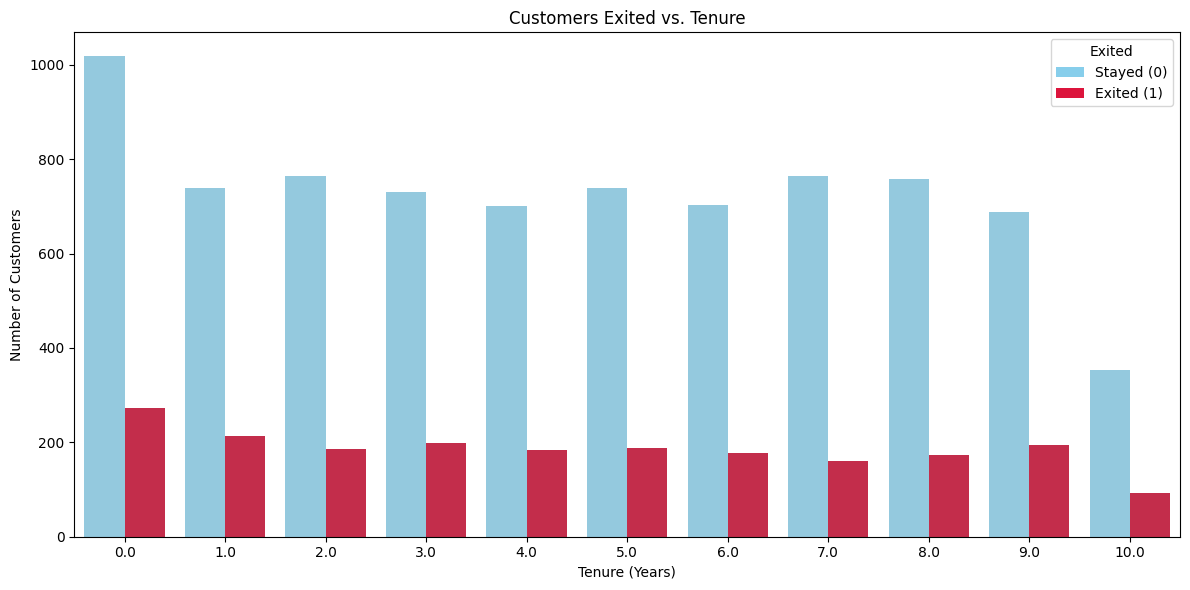

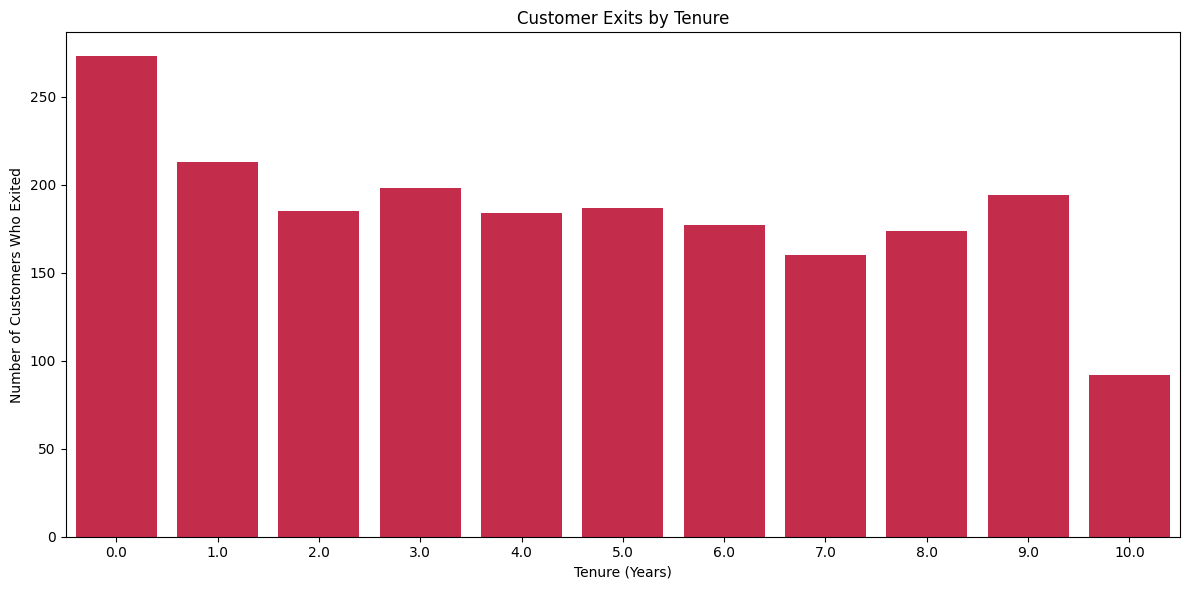

In [7]:
#exit vs tenure
data['tenure'] = data['tenure'].fillna(0)



tenure_exit = data.groupby(['tenure', 'exited']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=tenure_exit,
    x='tenure',
    y='count',
    hue='exited',
    palette={0: 'skyblue', 1: 'crimson'} 
)

plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Customers')
plt.title('Customers Exited vs. Tenure')
custom_legend = [
    Patch(facecolor='skyblue', label='Stayed (0)'),
    Patch(facecolor='crimson', label='Exited (1)')
]
plt.legend(handles=custom_legend, title='Exited')


plt.tight_layout()
plt.show()

print()
print()

exited_data = data[data['exited'] == 1]

plt.figure(figsize=(12, 6))
sns.countplot(data=exited_data, x='tenure', color='crimson')

plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Customers Who Exited')
plt.title('Customer Exits by Tenure')




plt.tight_layout()
plt.show()


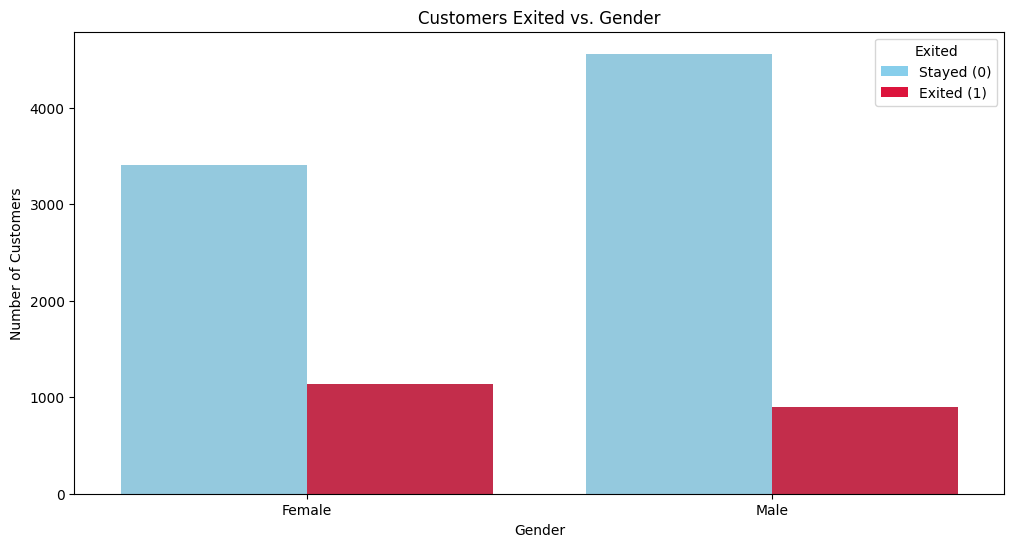

In [8]:
#exits by gender
gender_exit = data.groupby(['gender', 'exited']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=gender_exit,
    x='gender',
    y='count',
    hue='exited',
    palette=['skyblue', 'crimson']
)

plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Customers Exited vs. Gender')
custom_legend = [
    Patch(facecolor='skyblue', label='Stayed (0)'),
    Patch(facecolor='crimson', label='Exited (1)')]

plt.legend(handles=custom_legend, title='Exited')
plt.show()

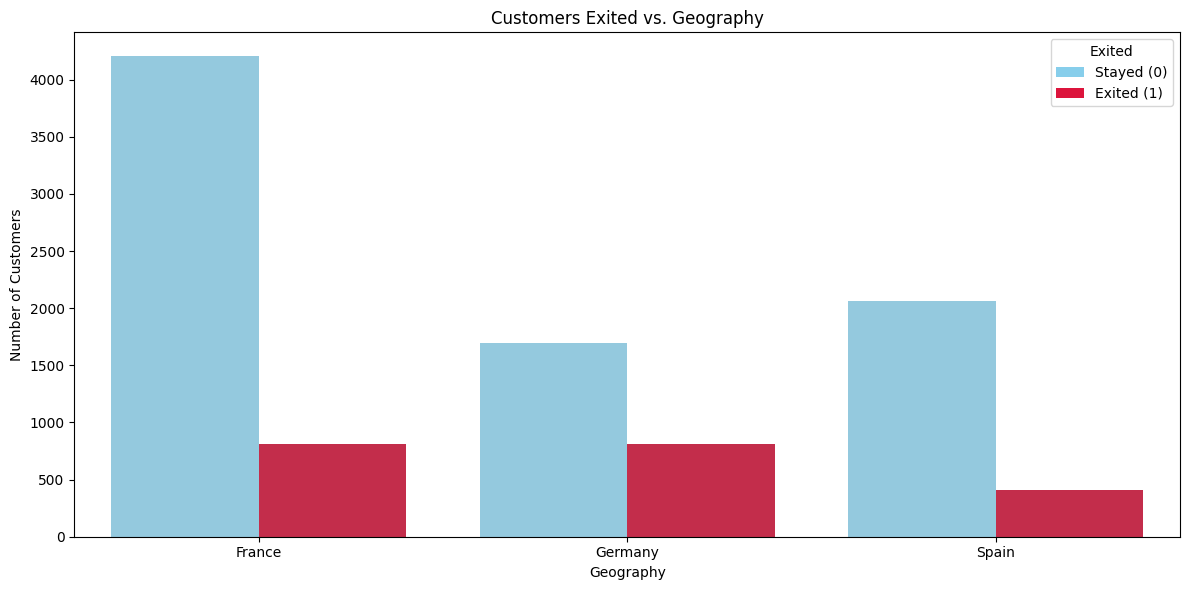

In [9]:
#exits by geography
geography_exit = data.groupby(['geography', 'exited']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=geography_exit,
    x='geography',
    y='count',
    hue='exited',
    palette={0: 'skyblue', 1: 'crimson'} 
)

plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.title('Customers Exited vs. Geography')
custom_legend = [
    Patch(facecolor='skyblue', label='Stayed (0)'),
    Patch(facecolor='crimson', label='Exited (1)')
]
plt.legend(handles=custom_legend, title='Exited')


plt.tight_layout()
plt.show()


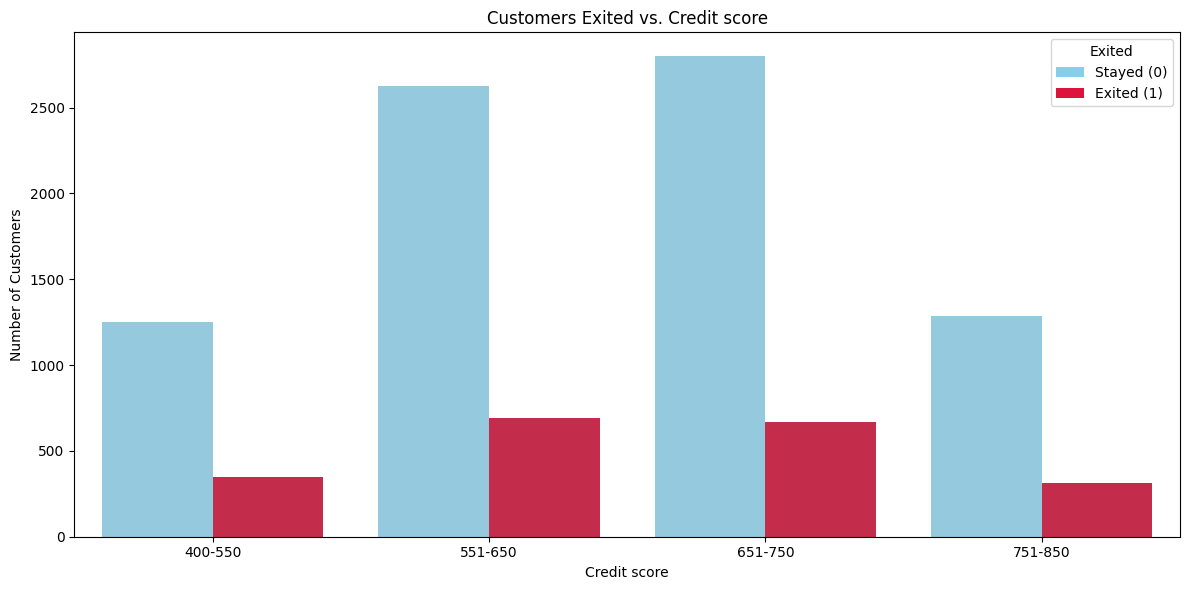

In [10]:
#exits by credit score
data_for_plot = data.copy()


bins = [400, 550, 650, 750, 850]
labels = ['400-550', '551-650', '651-750', '751-850']


data_for_plot['creditscore_bin'] = pd.cut(data_for_plot['creditscore'], bins=bins, labels=labels, right=True)


creditscore_exit_binned = data_for_plot.groupby(['creditscore_bin', 'exited']).size().reset_index(name='count')


plt.figure(figsize=(12, 6))
sns.barplot(
    data=creditscore_exit_binned,
    x='creditscore_bin',
    y='count',
    hue='exited',
    palette={0: 'skyblue', 1: 'crimson'}
)

plt.xlabel('Credit score')
plt.ylabel('Number of Customers')
plt.title('Customers Exited vs. Credit score')

custom_legend = [
    Patch(facecolor='skyblue', label='Stayed (0)'),
    Patch(facecolor='crimson', label='Exited (1)')
]
plt.legend(handles=custom_legend, title='Exited')

plt.tight_layout()
plt.show()

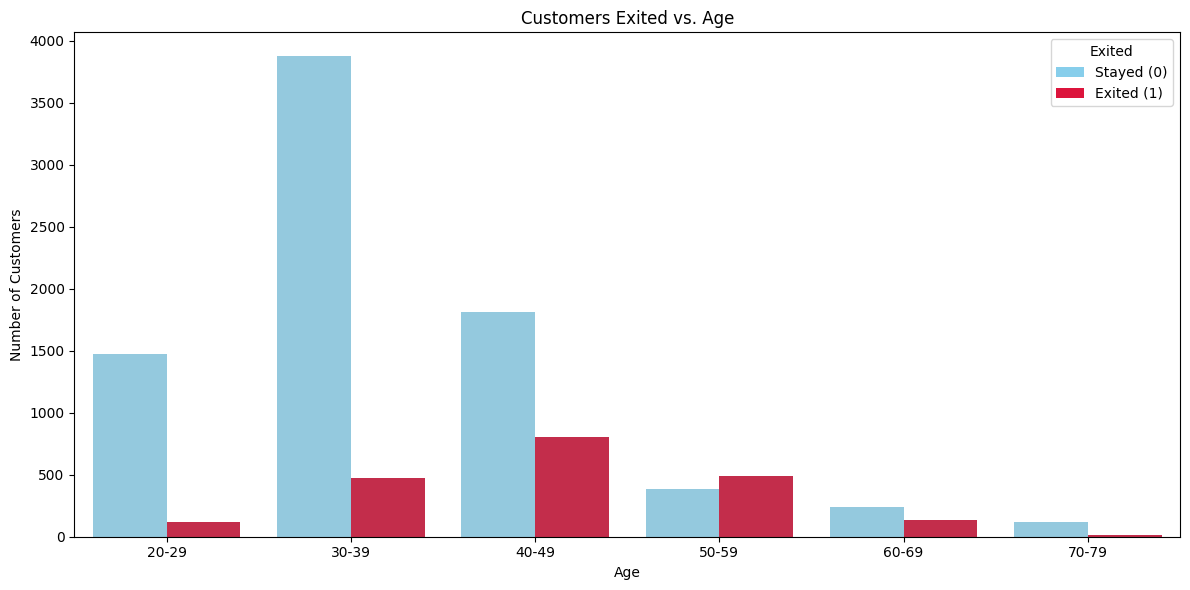

In [11]:
#exits by age
data_for_plot = data.copy()


bins = [20, 30, 40, 50, 60, 70, 80] 
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']


data_for_plot['age_bin'] = pd.cut(data_for_plot['age'], bins=bins, labels=labels, right=False)


age_exit_binned = data_for_plot.groupby(['age_bin', 'exited']).size().reset_index(name='count')


plt.figure(figsize=(12, 6))
sns.barplot(
    data=age_exit_binned,
    x='age_bin',
    y='count',
    hue='exited',
    palette={0: 'skyblue', 1: 'crimson'}
)

plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Customers Exited vs. Age')

custom_legend = [
    Patch(facecolor='skyblue', label='Stayed (0)'),
    Patch(facecolor='crimson', label='Exited (1)')
]
plt.legend(handles=custom_legend, title='Exited')

plt.tight_layout()
plt.show()


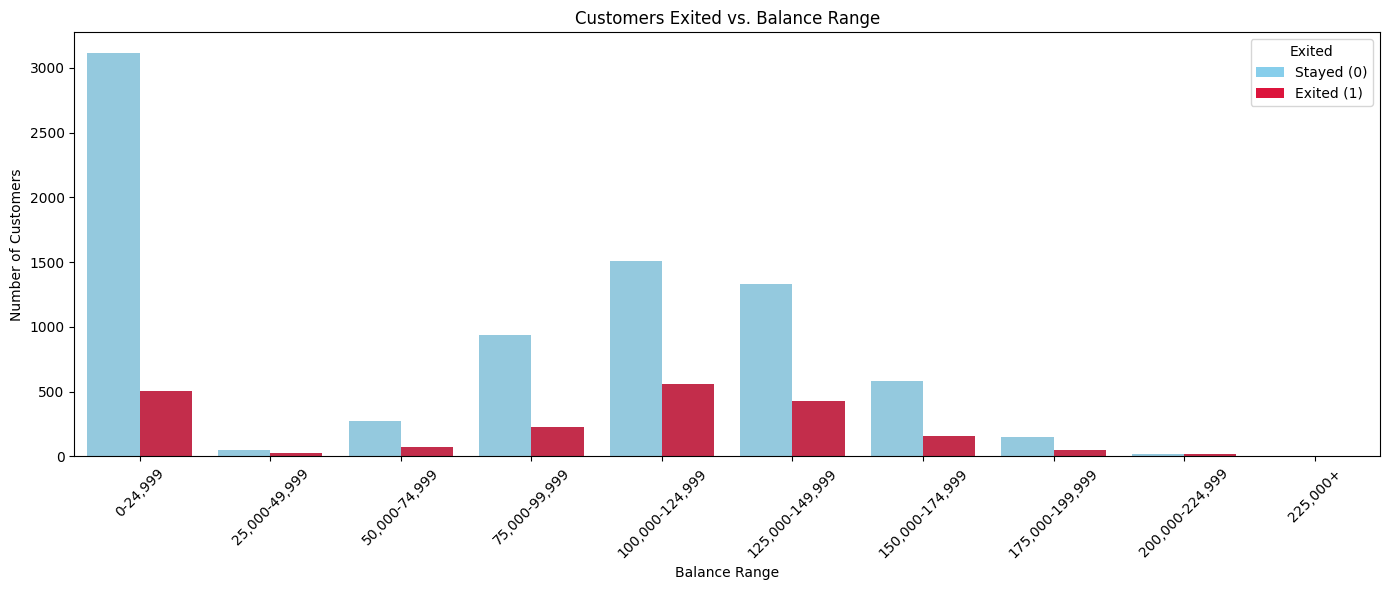

In [12]:
#exits by balance
data_for_plot = data.copy()

bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, float('inf')]
labels = [
    '0-24,999',
    '25,000-49,999',
    '50,000-74,999',
    '75,000-99,999',
    '100,000-124,999',
    '125,000-149,999',
    '150,000-174,999',
    '175,000-199,999',
    '200,000-224,999',
    '225,000+'
]


data_for_plot['balance_bin'] = pd.cut(data_for_plot['balance'], bins=bins, labels=labels, right=False)


balance_exit_binned = data_for_plot.groupby(['balance_bin', 'exited']).size().reset_index(name='count')


plt.figure(figsize=(14, 6))
sns.barplot(data=balance_exit_binned, x='balance_bin', y='count', hue='exited', palette={0: 'skyblue', 1: 'crimson'})

plt.xlabel('Balance Range')
plt.ylabel('Number of Customers')
plt.title('Customers Exited vs. Balance Range')

custom_legend = [Patch(facecolor='skyblue', label='Stayed (0)'), Patch(facecolor='crimson', label='Exited (1)')]
plt.legend(handles=custom_legend, title='Exited')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

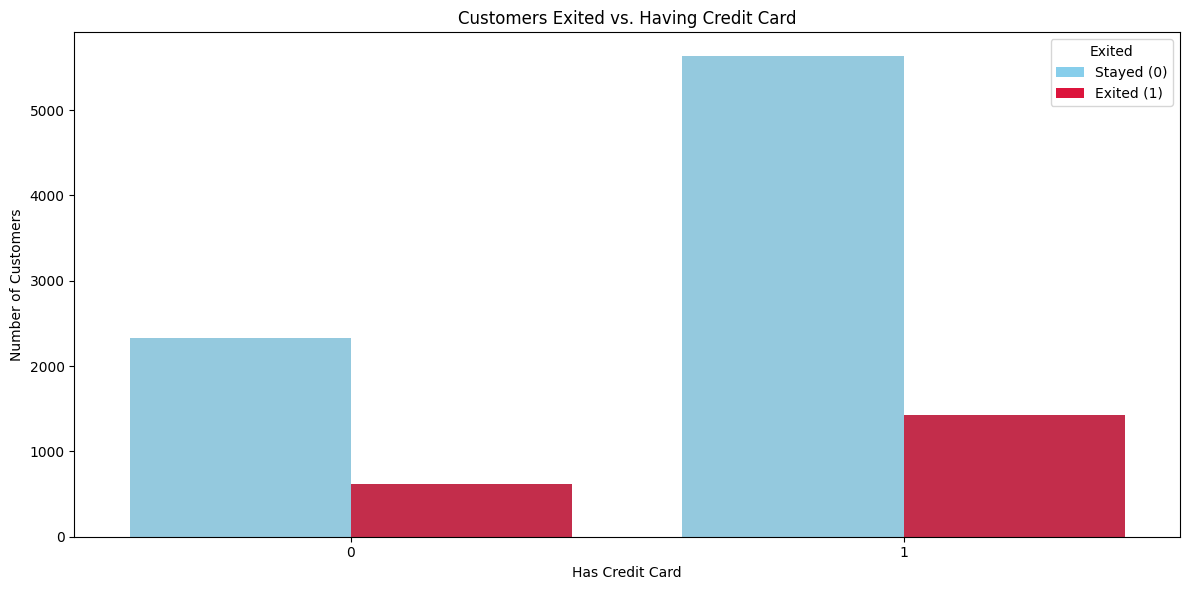

In [13]:
#exits by has credit card
hascrcard_exit = data.groupby(['hascrcard', 'exited']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=hascrcard_exit,
    x='hascrcard',
    y='count',
    hue='exited',
    palette={0: 'skyblue', 1: 'crimson'} 
)

plt.xlabel('Has Credit Card')
plt.ylabel('Number of Customers')
plt.title('Customers Exited vs. Having Credit Card')
custom_legend = [
    Patch(facecolor='skyblue', label='Stayed (0)'),
    Patch(facecolor='crimson', label='Exited (1)')
]
plt.legend(handles=custom_legend, title='Exited')


plt.tight_layout()
plt.show()


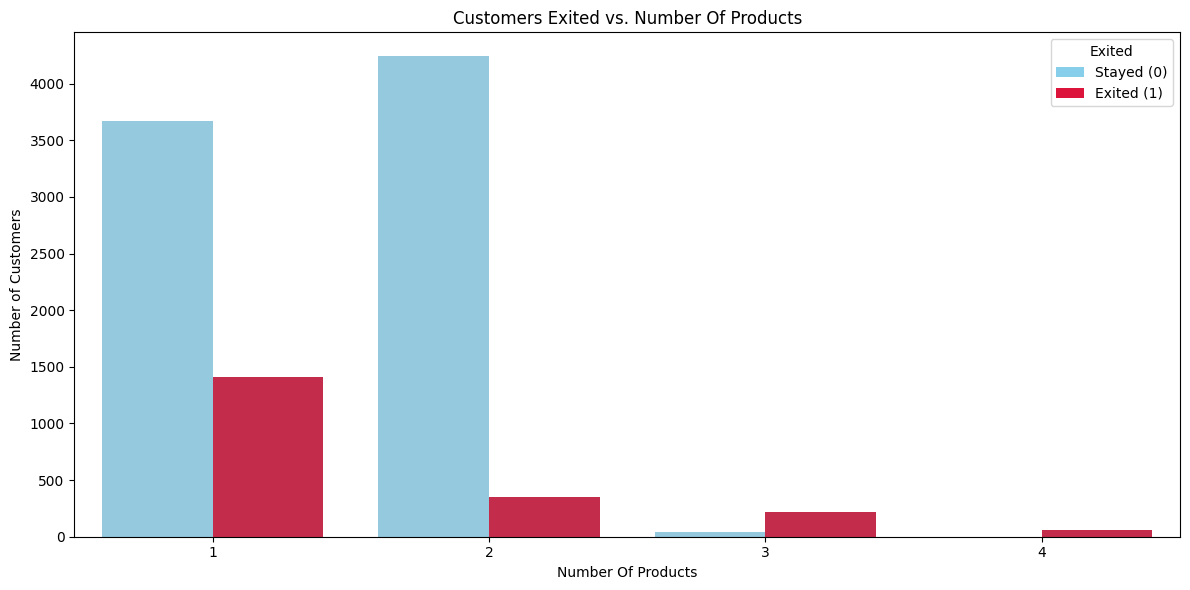

In [14]:
#exits by number of products
numofproducts_exit = data.groupby(['numofproducts', 'exited']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=numofproducts_exit,
    x='numofproducts',
    y='count',
    hue='exited',
    palette={0: 'skyblue', 1: 'crimson'} 
)

plt.xlabel('Number Of Products')
plt.ylabel('Number of Customers')
plt.title('Customers Exited vs. Number Of Products')
custom_legend = [
    Patch(facecolor='skyblue', label='Stayed (0)'),
    Patch(facecolor='crimson', label='Exited (1)')
]
plt.legend(handles=custom_legend, title='Exited')


plt.tight_layout()
plt.show()


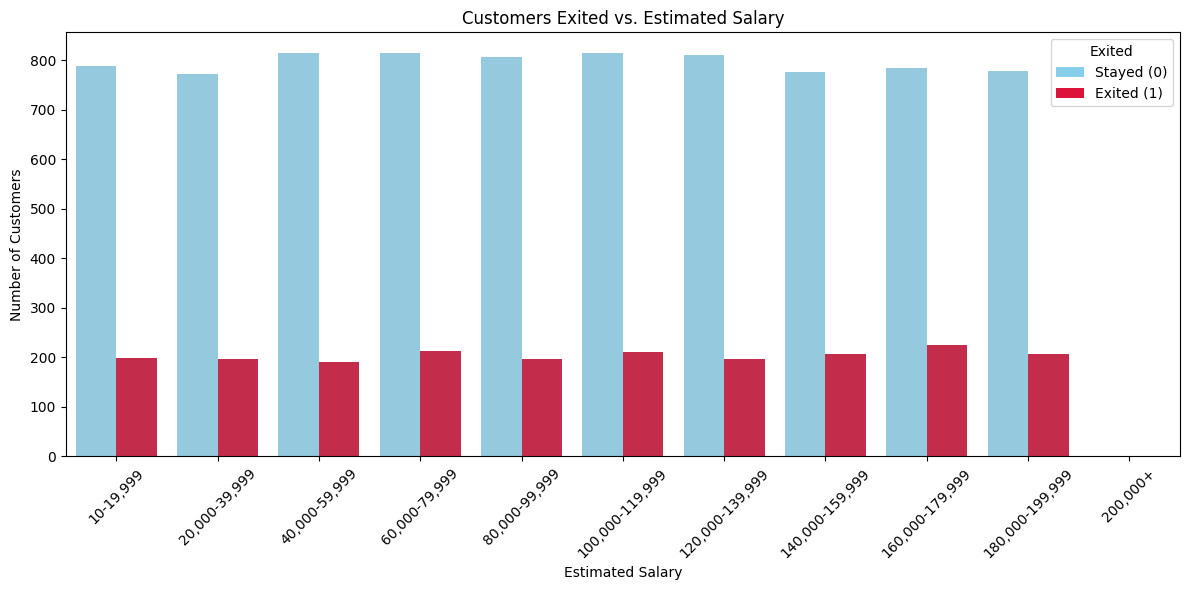

In [15]:
#exits by estimated slary
data_for_plot = data.copy()


bins = [10, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, float('inf')]
labels = [
    '10-19,999', '20,000-39,999', '40,000-59,999', '60,000-79,999', '80,000-99,999',
    '100,000-119,999', '120,000-139,999', '140,000-159,999', '160,000-179,999',
    '180,000-199,999', '200,000+'
]


data_for_plot['estimatedsalary_bin'] = pd.cut(
    data_for_plot['estimatedsalary'],
    bins=bins,
    labels=labels,
    right=False
)

# Group by the binned salary and exited status, count number of customers
estimatedsalary_exit_binned = data_for_plot.groupby(
    ['estimatedsalary_bin', 'exited']
).size().reset_index(name='count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=estimatedsalary_exit_binned,
    x='estimatedsalary_bin',
    y='count',
    hue='exited',
    palette={0: 'skyblue', 1: 'crimson'}
)

plt.xlabel('Estimated Salary')
plt.ylabel('Number of Customers')
plt.title('Customers Exited vs. Estimated Salary')

custom_legend = [
    Patch(facecolor='skyblue', label='Stayed (0)'),
    Patch(facecolor='crimson', label='Exited (1)')
]
plt.legend(handles=custom_legend, title='Exited')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Visualizations seem pretty stright forward, maybe a small correlation of extits between tenure before one year and a higher exit rate in germany. Lets start with a basic model to see what we acheive.

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Good work on the visualizations. You systematically explored relationships between churn and key features such as tenure, gender, geography, credit score, age, balance, number of products, and estimated salary. The plots are clear, well-labeled, and include legends for readability. Your observation about exits within the first year and the higher exit rate in Germany shows that you are connecting the data patterns with the business problem effectively.
</div>


In [20]:
#starting with basic model

data_to_encode = data.drop(['surname', 'customerid', 'rownumber'], axis=1)
data_ohe = pd.get_dummies(data_to_encode, drop_first=True)

# Setting target and features
target = data_ohe['exited']
features = data_ohe.drop('exited', axis=1)

# Splitting data into train, temp
features_train, features_temp, target_train, target_temp = train_test_split(
    features, target,
    test_size=0.4,
    random_state=12345,
    stratify=target)

# Splitting temp into validation and test
features_valid, features_test, target_valid, target_test = train_test_split(
    features_temp, target_temp,
    test_size=0.5,
    random_state=12345,
    stratify=target_temp)

# Create copies to modify
features_train_mod = features_train.copy()
features_valid_mod = features_valid.copy()  # corrected here

# Increase weight of tenure
features_train_mod.loc[:, 'tenure'] = features_train_mod['tenure'] * 1.5
features_valid_mod.loc[:, 'tenure'] = features_valid_mod['tenure'] * 1.5

# Increase weight for Germany customers
features_train_mod.loc[:, 'geography_Germany'] = features_train_mod['geography_Germany'] * 1.5
features_valid_mod.loc[:, 'geography_Germany'] = features_valid_mod['geography_Germany'] * 1.5

# Standardize the data
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train_mod)
features_valid_scaled = scaler.transform(features_valid_mod)

# Train logistic regression model
model = LogisticRegression()
model.fit(features_train_scaled, target_train)

# Predict on validation set
predicted_valid = model.predict(features_valid_scaled)
probabilities_valid = model.predict_proba(features_valid_scaled)[:, 1]

# Evaluate performance on validation set
print(f1_score(target_valid, predicted_valid))
print(roc_auc_score(target_valid, probabilities_valid))


0.3076923076923077
0.7875545004433935


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Good job on the preprocessing. You correctly dropped identifiers like `surname`, `customerid`, and `rownumber` that do not contribute to prediction. You also applied one-hot encoding to categorical features and separated the target from the feature set before splitting the data. These are all essential steps for preparing the dataset properly for modeling.
</div>

<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  You have done a great work so far, but the data should be split into three sets: training, validation, and test. Right now you only created a train/validation split. Please introduce a proper test set so that after model selection and tuning you can evaluate the final performance on unseen data, as required by the project.<br><br>
  Hint: you can achieve this by first splitting into train and temporary sets, and then splitting the temporary set into validation and test. For example:<br>
  <code>train, temp, y_train, y_temp = train_test_split(features, target, test_size=0.4, random_state=12345, stratify=target)</code><br>
  <code>valid, test, y_valid, y_test = train_test_split(temp, y_temp, test_size=0.5, random_state=12345, stratify=y_temp)</code><br><br>
  Remember that the F1 score you report in the conclusion should come from the unseen test set, after all model choices and parameter tuning are finalized.
</div>


<div class="alert alert-warning">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Suggestion: You are getting a `SettingWithCopyWarning` when modifying columns in your train and validation sets. This happens because Pandas sometimes returns a view instead of a copy. To avoid this, explicitly use `.loc` on the DataFrame or call `.copy()` when creating subsets. For example:<br><br>
  `train = train.copy()`<br>
  This will ensure your changes are applied safely without unintended side effects.
</div>


In [21]:
#didnt get the score we wanted, i want to see what happens if we remove the weights

#standardize the data
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train_mod)  # use modified train features

features_valid_scaled = scaler.transform(features_valid_mod)     # use modified validation features

model = LogisticRegression()
model.fit(features_train_scaled, target_train)

predicted_valid = model.predict(features_valid_scaled)

print(f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)


0.3076923076923077
0.7875545004433935


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Good move testing the model again without the manual feature weighting. This shows you are experimenting to see how different preprocessing choices affect performance. You also correctly evaluated both F1 and AUC-ROC, which is required by the project.
</div>

<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  You are repeating the encoding and train/validation split steps in this section. Since you will add the proper three-way split as mentioned earlier, remember that data preparation (dropping identifiers, encoding, splitting into features and target) should be done once before training and testing models. In your final notebook, you can safely remove these repeated blocks and keep a single clean preprocessing workflow. This will make the code easier to follow and reduce redundancy.
</div>


In [22]:
#lets try higher weights

features_train_mod.loc[:, 'tenure'] = features_train_mod['tenure'] * 3
features_valid_mod.loc[:, 'tenure'] = features_valid_mod['tenure'] * 3

# Increase weight for Germany customers by 3
features_train_mod.loc[:, 'geography_Germany'] = features_train_mod['geography_Germany'] * 3
features_valid_mod.loc[:, 'geography_Germany'] = features_valid_mod['geography_Germany'] * 3

# Standardize the data
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train_mod)
features_valid_scaled = scaler.transform(features_valid_mod)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(features_train_scaled, target_train)

# Predict on validation set
predicted_valid = model.predict(features_valid_scaled)

# Predict probabilities for ROC AUC
probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]

# Evaluate performance
print(f1_score(target_valid, predicted_valid))
print(roc_auc_score(target_valid, probabilities_one_valid))


0.3076923076923077
0.7875545004433935


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  It is good that you are systematically testing the effect of different feature weightings, such as increasing the influence of tenure and geography. This shows experimentation and awareness of potential feature importance, which is valuable in the modeling process.
</div>

<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  The same issue with repeated preprocessing steps appears here as well. Remember that data cleaning, encoding, and splitting should be done once before model training. Please remove the repeated code blocks in the final version for clarity and maintainability.
</div>


In [24]:
# our auc/roc seems decent so its understanding balance well, lets adjust the threshold.
best_threshold = 0
best_f1 = 0

for threshold in [i * 0.05 for i in range(1, 20)]:  # thresholds from 0.05 to 0.95
    preds = (probabilities_one_valid >= threshold).astype(int)
    score = f1_score(target_valid, preds)
    if score > best_f1:
        best_f1 = score
        best_threshold = threshold

print(f"Best threshold: {best_threshold}")
print(f"Best F1 score: {best_f1}")



Best threshold: 0.25
Best F1 score: 0.5178571428571428


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Excellent work on adjusting the decision threshold. Iterating through possible cutoffs and selecting the one that maximizes the F1 score is exactly the right approach for an imbalanced classification problem like churn prediction. This shows you are not relying only on the default 0.5 threshold and are actively optimizing for the project’s required metric.
</div>


In [25]:
#lets apply the threshold and work from there
features_train_mod.loc[:, 'tenure'] = features_train_mod['tenure'] * 3
features_valid_mod.loc[:, 'tenure'] = features_valid_mod['tenure'] * 3

# Increase weight for Germany customers by 3
features_train_mod.loc[:, 'geography_Germany'] = features_train_mod['geography_Germany'] * 3
features_valid_mod.loc[:, 'geography_Germany'] = features_valid_mod['geography_Germany'] * 3

# Standardize the data
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train_mod)
features_valid_scaled = scaler.transform(features_valid_mod)

# Train Logistic Regression model with random_state
model = LogisticRegression(random_state=12345)
model.fit(features_train_scaled, target_train)

# Predict probabilities on validation set
probabilities_valid = model.predict_proba(features_valid_scaled)[:, 1]

# Apply threshold 0.25 to convert probabilities to class labels
threshold = 0.25
predicted_labels = (probabilities_valid >= threshold).astype(int)

# Calculate metrics
print(f1_score(target_valid, predicted_labels))
print(roc_auc_score(target_valid, probabilities_valid))


0.5178571428571428
0.7875545004433935


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Good job applying the chosen threshold to generate predictions. This demonstrates you are putting the threshold tuning into practice rather than just reporting the best cutoff. Evaluating both the adjusted F1 score and AUC-ROC here is the right way to check whether the model benefits from this change.
</div>

<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Same issue here with repeated preprocessing.
</div>


In [26]:
#better score! lets balance the weight this time.

# Standardize the data
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train_mod)
features_valid_scaled = scaler.transform(features_valid_mod)

# Train Logistic Regression with balanced class weight and random state
model = LogisticRegression(class_weight='balanced', random_state=12345)
model.fit(features_train_scaled, target_train)

# Predict probabilities on validation set
probabilities_valid = model.predict_proba(features_valid_scaled)[:, 1]

# Apply threshold 0.25 to convert probabilities to class labels
threshold = 0.25
predicted_labels = (probabilities_valid >= threshold).astype(int)

# Calculate and print metrics
print(f1_score(target_valid, predicted_labels))
print(roc_auc_score(target_valid, probabilities_valid))



0.4010335917312661
0.7937173613163858


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Good use of the `class_weight='balanced'` parameter in Logistic Regression. This is one of the recommended approaches for handling class imbalance, and combining it with a tuned threshold is a solid strategy.
</div>

<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Same issue here with repeated preprocessing.
</div>


In [27]:
#lets try another weight adjustment

#standardize the data
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train_mod)
features_valid_scaled = scaler.transform(features_valid_mod)

model = LogisticRegression(class_weight={0:1, 1:3}, random_state=12345)
model.fit(features_train_scaled, target_train)
predicted_valid = model.predict(features_valid_scaled)



probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]

threshold = 0.25
predicted_labels = (probabilities_one_valid >= threshold).astype(int)


auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f1_score(target_valid, predicted_labels))
print(auc_roc)

0.4279279279279279
0.7928228766380924


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great to see you experimenting with custom class weights in Logistic Regression. Adjusting the relative weight of the minority class is another valid way to address imbalance and can help boost recall for churned customers.
</div>

<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Same issue here with repeated preprocessing.
</div>


In [28]:
# lets try random forest

#standardize the data
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train_mod)

features_valid_scaled = scaler.transform(features_valid_mod)

model = RandomForestClassifier(class_weight={0:1, 1:3}, random_state=12345)
model.fit(features_train_scaled, target_train)
predicted_valid = model.predict(features_valid_scaled)



probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]

threshold = 0.25
predicted_labels = (probabilities_one_valid >= threshold).astype(int)


auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f1_score(target_valid, predicted_labels))
print(auc_roc)


0.6145833333333334
0.8662460587249975


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Good step including Random Forest in your experiments. Trying a tree-based model provides a useful non-linear comparison to Logistic Regression, and it can often capture complex feature interactions more effectively. Including class weights here is also a solid move for handling imbalance.
</div>

<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Same issue here with repeated preprocessing.
</div>


In [29]:
#nice we hit our target but i want to see if we can get even better results
best_f1 = 0
best_depth = None

for depth in range(1, 21):  # try depths from 1 to 20
    model = RandomForestClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train_scaled, target_train)

    probabilities_valid = model.predict_proba(features_valid_scaled)[:, 1]

    threshold = 0.25  # use your best threshold from earlier
    predicted_labels = (probabilities_valid >= threshold).astype(int)

    current_f1 = f1_score(target_valid, predicted_labels)

    if current_f1 > best_f1:
        best_f1 = current_f1
        best_depth = depth

    print(f"Depth: {depth}, F1: {current_f1:.4f}")

print(f"\n✅ Best depth: {best_depth}, Best F1: {best_f1:.4f}")

best_threshold = 0
best_f1 = 0

for threshold in np.arange(0.1, 0.9, 0.01):
    predicted_labels = (probabilities_one_valid >= threshold).astype(int)
    score = f1_score(target_valid, predicted_labels)
    if score > best_f1:
        best_f1 = score
        best_threshold = threshold

print(f"Best threshold: {best_threshold}")
print(f"Best F1 score: {best_f1}")


Depth: 1, F1: 0.5920
Depth: 2, F1: 0.5966
Depth: 3, F1: 0.5971
Depth: 4, F1: 0.6218
Depth: 5, F1: 0.6246
Depth: 6, F1: 0.6316
Depth: 7, F1: 0.6215
Depth: 8, F1: 0.6499
Depth: 9, F1: 0.6427
Depth: 10, F1: 0.6414
Depth: 11, F1: 0.6282
Depth: 12, F1: 0.6263
Depth: 13, F1: 0.6218
Depth: 14, F1: 0.6125
Depth: 15, F1: 0.6275
Depth: 16, F1: 0.6091
Depth: 17, F1: 0.6157
Depth: 18, F1: 0.6176
Depth: 19, F1: 0.6066
Depth: 20, F1: 0.6049

✅ Best depth: 8, Best F1: 0.6499
Best threshold: 0.3699999999999999
Best F1 score: 0.6435897435897435


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great work experimenting with hyperparameter tuning for Random Forest. Testing different `max_depth` values and tracking the F1 score shows a clear and systematic approach to improving the model. It’s also good that you combined this with threshold adjustment, which gives you an extra layer of optimization.
</div>

In [30]:
#applying new threshold and depth with test set

# Train the model on the modified training set
model = RandomForestClassifier(max_depth=8, class_weight={0:1, 1:3}, random_state=12345)
model.fit(features_train_mod, target_train)

# Predict on the test set
predicted_test = model.predict(features_test)

# Predict probabilities on the test set
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

# Apply threshold 0.45
threshold = 0.45
predicted_labels_test = (probabilities_one_test >= threshold).astype(int)

# Evaluate performance on the test set
auc_roc_test = roc_auc_score(target_test, probabilities_one_test)

print(f1_score(target_test, predicted_labels_test))
print(auc_roc_test)

0.5967940813810111
0.8479573564319327


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Nice application of the tuned hyperparameters and adjusted threshold. Using a `max_depth` that gave you the best validation results, combined with a recalibrated threshold, shows a clear effort to refine the model for stronger performance. Including class weights here further strengthens the approach against imbalance.
</div>

<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Same issue here with repeated preprocessing.
</div>


<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Good work so far. Now it is time to select your best performing model based on the validation set, retrain it on the combined training and validation data, and then evaluate it on the unseen test set. That final test evaluation is the F1 score we are looking for.<br><br>
  Suggestion: if the threshold alone does not achieve the required score, you can try combining Random Forest with other imbalance-handling techniques such as upsampling or class weighting to improve results.
</div>


Project Summary

The modeling process began with preprocessing the dataset by removing irrelevant columns and encoding categorical variables using one-hot encoding. The target variable was defined, and the data was split into training and validation sets.

Initially, feature scaling was applied, and logistic regression was used as the baseline model. To address class imbalance, different strategies were explored:

Manual feature weighting: Certain features such as tenure and customers from Germany were given increased weights by multiplying their values, aiming to amplify their influence on the model.

Class weight adjustment: The logistic regression model was configured with custom class weights to penalize misclassification of the minority class more heavily. Different weighting schemes were tested, including the built-in 'balanced' option and manual class weights (e.g., {0:1, 1:3}).

The experiments revealed that manual feature weighting improved the F1 score, while applying class weight balancing reduced it slightly. Custom class weights provided a middle ground in performance.

Following this, a switch was made to a Random Forest classifier, which inherently handles unscaled data and is often better suited for complex, non-linear relationships. The model was tuned by adjusting the maximum tree depth and applying class weights to balance the classes. Hyperparameter tuning was conducted to identify an optimal depth (e.g., max_depth=9).

The Random Forest model significantly improved performance metrics, achieving a higher F1 score and AUC-ROC compared to logistic regression.

Overall, iterative adjustments to feature weights, class weighting, model choice, and threshold tuning led to improved predictive performance on the customer churn dataset.